In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df= pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')

In [13]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [15]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [9]:
!pip install pandas scikit-learn matplotlib

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [17]:
categorical_columns = [
    'creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol',
    'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name',
    'time', 'detection_types'
]

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [18]:
features = ['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
            'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names',
            'observation_name', 'source.meta', 'source.name', 'time', 'detection_types']
X = df[features]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
model = IsolationForest(contamination=0.01, random_state=42)  # Set contamination to the expected fraction of anomalies
model.fit(X_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [21]:
df['anomaly'] = model.predict(X_scaled)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

In [22]:
print("Number of anomalies detected:", df['anomaly'].sum())

Number of anomalies detected: 3


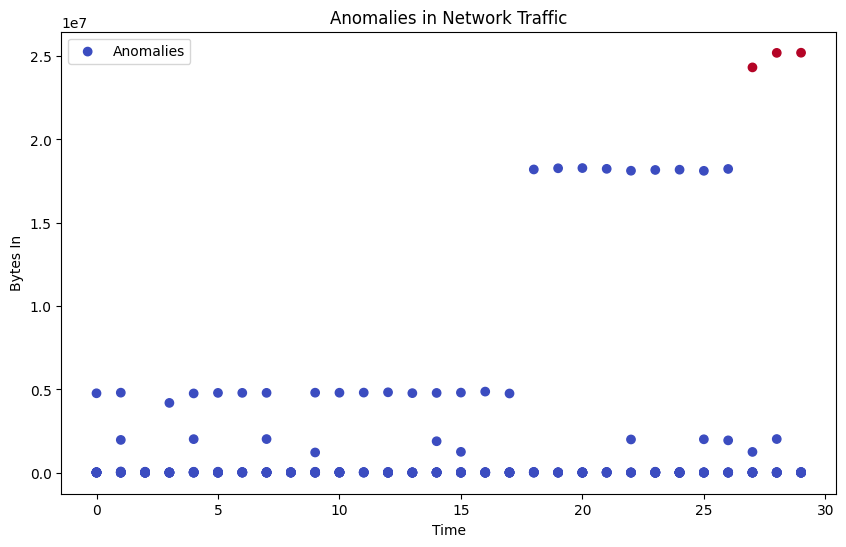

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['time'], df['bytes_in'], c=df['anomaly'], cmap='coolwarm', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Bytes In')
plt.title('Anomalies in Network Traffic')
plt.legend()
plt.show()